# Support Vector Machine


## Imports


In [15]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
%autoreload 2

In [ ]:
from util import *
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix ,f1_score

from sklearn.svm import SVC
NUM_FOLDS = 5

## Read the data


### Train Data


In [18]:
X, y = get_train_data(path='../data/train.csv')

In [19]:
# standardize the data
X = standardize_features(X)

In [20]:
X.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

### Validation Data


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X[0:20000], y[0:20000], test_size=0.2, random_state=42)

## Train the model


The `SVC` class in scikit-learn provides various parameters that allow you to customize the Support Vector Classification model. Here are some of the most commonly used parameters:

1. **C**: The regularization parameter. It controls the trade-off between allowing the model to fit the training data well and keeping the decision boundary smooth. Larger values of C lead to less regularization, allowing the model to fit the training data more closely. Default is 1.0.

2. **kernel**: Specifies the type of kernel used in the algorithm. It could be 'linear', 'poly', 'rbf' (radial basis function), 'sigmoid', or a custom kernel. Default is 'rbf'.

3. **degree**: Degree of the polynomial kernel function ('poly'). Ignored by all other kernels. Default is 3.

4. **gamma**: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. Higher values of gamma lead to more complex decision boundaries. If 'scale', it uses 1 / (n_features * X.var()) as gamma value. If 'auto', uses 1 / n_features. Default is 'scale'.

5. **coef0**: Independent term in kernel function. Used in 'poly' and 'sigmoid' kernels. Default is 0.0.

6. **shrinking**: Whether to use the shrinking heuristic. Shrinking heuristics can speed up training, especially for large datasets. Default is True.

7. **probability**: Whether to enable probability estimates. This must be enabled prior to calling `fit`, and it slows down the calculation. Default is False.

8. **tol**: Tolerance for stopping criteria. Default is 1e-3.

9. **cache_size**: Size of the kernel cache (in MB). Larger values lead to faster training but require more memory. Default is 200.

10. **class_weight**: Weights associated with classes. Useful for imbalanced datasets.

11. **verbose**: Controls the verbosity of the output.

12. **max_iter**: Hard limit on iterations within solver, or -1 for no limit. Default is -1.

These are some of the main parameters of the `SVC` class in scikit-learn. You can find more parameters and details in the scikit-learn documentation.

In [22]:
svm = SVC(gamma='auto', kernel='linear', C=1.0, random_state=0)
svm.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', random_state=0)

In [23]:
cv_results = cross_validate(svm, X_train, y_train, cv=NUM_FOLDS, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro', 'f1_weighted'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())
print('f1_weighted: ', cv_results['test_f1_weighted'].mean())

accuracy:  0.9021874999999999
f1_macro:  0.47428946936093314
f1_micro:  0.9021875000000001
f1_weighted:  0.8557960612781338


In [24]:
svm_predictions = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

print("Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.89925
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3597
           1       0.00      0.00      0.00       403

    accuracy                           0.90      4000
   macro avg       0.45      0.50      0.47      4000
weighted avg       0.81      0.90      0.85      4000



c:\Users\peter\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\peter\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\peter\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Analysis


### Feature Importance Plot

A feature importance plot shows the importance of each feature in the model. It can be used to identify the most important features and to understand the impact of each feature on the model's predictions.


     feature  importance
146  var_146    0.015879
174  var_174    0.014699
12    var_12    0.014382
179  var_179    0.013334
76    var_76    0.011969
..       ...         ...
41    var_41    0.000195
37    var_37    0.000159
25    var_25    0.000072
96    var_96    0.000048
63    var_63    0.000007

[200 rows x 2 columns]


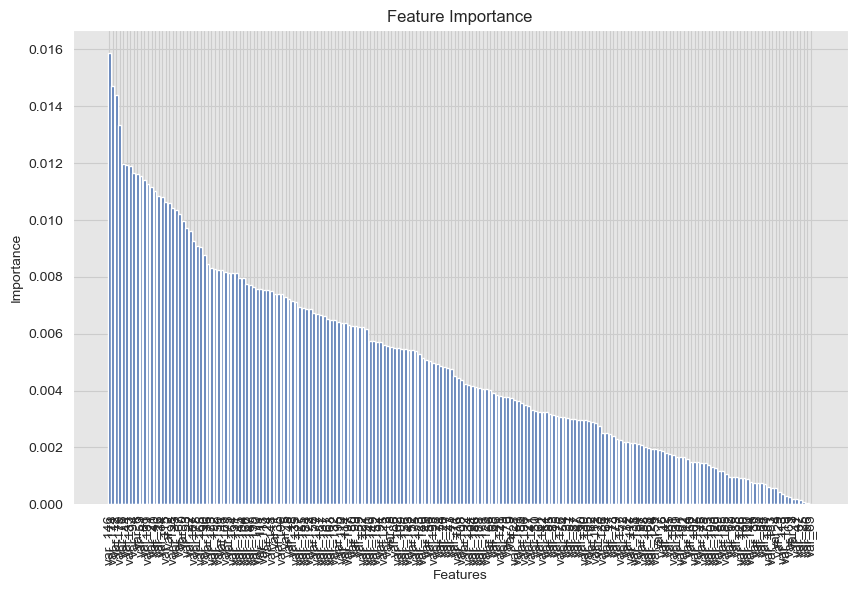

In [30]:
# Get the feature importance
importance = np.abs(svm.coef_[0])

feature_importance = get_feature_importance(
    features=X.columns, importance=importance)

# normalize the feature importance
feature_importance['importance'] = feature_importance['importance'] / \
    feature_importance['importance'].sum()
print(feature_importance)

plt = get_feature_importance_plot(feature_importance, modelname='SVM')
plt.show()


### Learning Curves Plot

show the training error (Ein) and validation error (Eval) as a function of the training set size


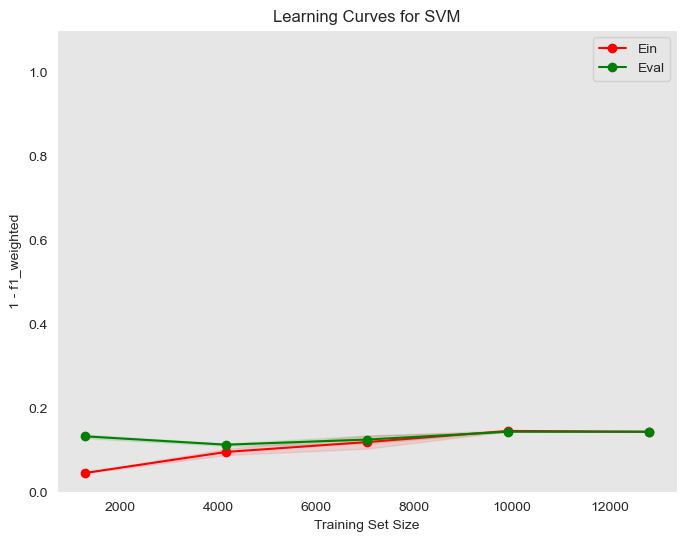

In [31]:
plt = get_learning_curve_plot(estimator=SVC(
    gamma='auto', kernel='linear', C=0.1, random_state=0), X=X_train, y=y_train, cv=NUM_FOLDS, modelname='SVM')
plt.show()


### Partial Dependence Plot:

A partial dependence plot shows the relationship between a feature and the model's predictions while holding all other features constant. It can be used to understand the impact of a single feature on the model's predictions i.e. PDPs show the average effect on predictions as the value of feature changes.

From the plots, we may see the type of the relationship between a feature and a prediction. Some relationships may look linear whereas other are more complex.


In [32]:
plt = get_partial_dependencies_plot(svm, X_train, modelname='SVM')
plt.show()


### Hyperparameter Tuning

This is a process of adjusting the parameters of a model to optimize its performance. It can be done using techniques like grid search, random search, or Bayesian optimization.


In [ ]:
# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}


### Grid Search


In [ ]:
grid_search = get_grid_search(estimator=SVC(gamma='auto', kernel='linear', C=1.0, random_state=0),
                                 param_grid=param_grid, X=X_train, y=y_train, cv=NUM_FOLDS, scoring='f1_weighted')
# Print the results
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)
print("Test score with best parameters:", grid_search.score(X_test, y_test))
# Get the results
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Prepare the hyperparameter values for plotting
param_values_C = param_grid['C']
param_values_gamma = param_grid['gamma']
param_values_kernel = param_grid['kernel']

# Reshape the mean test scores for plotting
mean_test_scores = np.array(mean_test_scores).reshape(len(param_values_C), len(param_values_gamma), len(param_values_kernel))

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap of mean test scores
sns.heatmap(mean_test_scores.mean(axis=0), annot=True, cmap='viridis', xticklabels=param_values_kernel, yticklabels=param_values_gamma)

# Set labels and title
plt.xlabel('kernel')
plt.ylabel('gamma')
plt.title('Mean Test Scores')

# Show the plot
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap of mean test scores
sns.heatmap(mean_test_scores.mean(axis=1), annot=True, cmap='viridis', xticklabels=param_values_kernel, yticklabels=param_values_C)

# Set labels and title
plt.xlabel('kernel')
plt.ylabel('C')
plt.title('Mean Test Scores')

# Show the plot
plt.show()


In [ ]:
#best parameters
model = SVC()
# train the model
model.fit(X_train, y_train)

# predict the validation set
y_pred = model.predict(X_test)

# Accuracy Score
print("Accuracy Score of " + str(model) + " is: " + str(accuracy_score(y_test, y_pred)))

# Confusion Matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Classification Report
print("Classification Report of " + str(model) + " is: \n" + str(classification_report(y_test, y_pred)))

# Weighted F1 Score
print("F1 Score of " + str(model) + " is: " + str(f1_score(y_test, y_pred, average='weighted')))
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean training score
mean_training_score = cv_scores.mean()
print("Mean Training Score: {}".format(mean_training_score))

# Calculate the mean cross-validation score
mean_cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
print("Mean Cross-Validation Score: {}".format(mean_cv_score))
# Calculate the gap between mean training score and mean cross-validation score
gap = mean_training_score - mean_cv_score

print("Gap between mean training score and mean cross-validation score:", gap)
print("------------------------------------------------------")

### Heatmap


In [ ]:
plot_hyper_param_heat_maps(param_grid, grid_search, modelname='SVM')


### Train-Validation Curve


In [ ]:

plot_hyper_param_train_validation_curve(estimator=SVC(
), param_grid=param_grid, X=X_train, y=y_train, cv=NUM_FOLDS, scoring='f1_weighted', modelname='SVM')


## Bias-Variance Analysis


In [ ]:

svm = SVC(gamma=0.1, kernel='rbf', C=100, random_state=0)

mse, bias, var = get_bias_variance(
    svm, X_train=X_train, y_train=y_train,  X_test=X_test, y_test=y_test)


In [ ]:
print("mse: ", mse)
print("bias: ", bias)
print("var: ", var)
print("Estimated Eout: ",bias + var)
